# Project Overview

Utilizing this movie dataset I would like to find out the features hat are highly correlated wih movies' gross earnings

In [90]:
#import necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

After importing the necessary libraries let's have a look at our dataset

In [2]:
df = pd.read_csv('movies.csv')
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [3]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
# Checking Columns with missing values and their percentage

for col in df.columns:
    if len(df[df[col].isnull() == True]) > 0:
        print(f'{col}:\n % Nulls  {round(100 * (len(df[df[col].isnull() == True]) /len(df)),2)}')

rating:
 % Nulls  1.0
released:
 % Nulls  0.03
score:
 % Nulls  0.04
votes:
 % Nulls  0.04
writer:
 % Nulls  0.04
star:
 % Nulls  0.01
country:
 % Nulls  0.04
budget:
 % Nulls  28.31
gross:
 % Nulls  2.46
company:
 % Nulls  0.22
runtime:
 % Nulls  0.05


# Cleaning the Data

As we can see a lot of our columns contain missing values, we will have to clean the data before continuing with the analysis.

Let me take you through ...

In [6]:
# Starting with the column that contains the least missing values

df[df['star'].isnull() == True ]

name rating    genre  year  \
474  The Business of Show Business    NaN  History  1983   

                       released  score  votes   director     writer star  \
474  February 15, 1983 (Canada)    8.3   79.0  Tom Logan  Tom Logan  NaN   

    country    budget  gross company  runtime  
474  Canada  323562.0    NaN     CTV     55.0

The star column contains one missing row. Finding its value is not that difficult as a simple Google search would provide me the correct data.

Well after the search, in this case the star was also the director and writer,Tom Logan. Interesting isn't it!

Now lets fill the missing value

In [7]:
df['star'].fillna('Tom Logan',inplace = True)

df[df['name'] == 'The Business of Show Business']

name rating    genre  year  \
474  The Business of Show Business    NaN  History  1983   

                       released  score  votes   director     writer  \
474  February 15, 1983 (Canada)    8.3   79.0  Tom Logan  Tom Logan   

          star country    budget  gross company  runtime  
474  Tom Logan  Canada  323562.0    NaN     CTV     55.0

In [8]:
# Next column is the country column

df[df['country'].isnull() == True]

name rating   genre  year  \
5728  Saw: The Final Chapter      R   Crime  2010   
5730             The Wolfman      R   Drama  2010   
7615            Clinton Road    NaN  Horror  2019   

                           released  score     votes        director  \
5728                            NaN    5.6   93000.0  Kevin Greutert   
5730                            NaN    5.8  104000.0    Joe Johnston   
7615  June 14, 2019 (United States)    5.9    1900.0  Richard Grieco   

                   writer              star country     budget    gross  \
5728       Patrick Melton        Tobin Bell     NaN        NaN      NaN   
5730  Andrew Kevin Walker  Benicio Del Toro     NaN        NaN      NaN   
7615          Noel Ashman         Ace Young     NaN  2500000.0  50400.0   

                       company  runtime  
5728                       NaN      NaN  
5730                       NaN      NaN  
7615  Growing Tree Productions     77.0

In [9]:
# Also same as the star column a simple Google search is able to save our data

df.loc[df['name'].isin(['Saw: The Final Chapter', 'The Wolfman', 'Clinton Road']), 'country'] = df.loc[df['name'].isin(['Saw: The Final Chapter', 'The Wolfman', 'Clinton Road']), 'country'].fillna('United States')
 

df[df['name'].isin(['Saw: The Final Chapter','The Wolfman','Clinton Road'])]

name rating   genre  year  \
5728  Saw: The Final Chapter      R   Crime  2010   
5730             The Wolfman      R   Drama  2010   
7615            Clinton Road    NaN  Horror  2019   

                           released  score     votes        director  \
5728                            NaN    5.6   93000.0  Kevin Greutert   
5730                            NaN    5.8  104000.0    Joe Johnston   
7615  June 14, 2019 (United States)    5.9    1900.0  Richard Grieco   

                   writer              star        country     budget  \
5728       Patrick Melton        Tobin Bell  United States        NaN   
5730  Andrew Kevin Walker  Benicio Del Toro  United States        NaN   
7615          Noel Ashman         Ace Young  United States  2500000.0   

        gross                   company  runtime  
5728      NaN                       NaN      NaN  
5730      NaN                       NaN      NaN  
7615  50400.0  Growing Tree Productions     77.0

In [10]:
for col in df.columns:
    if len(df[df[col].isnull() == True]) > 0:
        print(f'{col}:\n % Nulls  {round(100 * (len(df[df[col].isnull() == True]) /len(df)),2)}')

rating:
 % Nulls  1.0
released:
 % Nulls  0.03
score:
 % Nulls  0.04
votes:
 % Nulls  0.04
writer:
 % Nulls  0.04
budget:
 % Nulls  28.31
gross:
 % Nulls  2.46
company:
 % Nulls  0.22
runtime:
 % Nulls  0.05


In [11]:
df[df['released'].isnull() == True]

name rating  genre  year released  score     votes  \
5728  Saw: The Final Chapter      R  Crime  2010      NaN    5.6   93000.0   
5730             The Wolfman      R  Drama  2010      NaN    5.8  104000.0   

            director               writer              star        country  \
5728  Kevin Greutert       Patrick Melton        Tobin Bell  United States   
5730    Joe Johnston  Andrew Kevin Walker  Benicio Del Toro  United States   

      budget  gross company  runtime  
5728     NaN    NaN     NaN      NaN  
5730     NaN    NaN     NaN      NaN

These were the same movies having missing values in the country columns. They also have a lot of other columns missing their values. Upon a google search on the remining columns, the results are not very clear.As we are simulating a real world working environment, we will get rid of these two rows as we already have a substantial amount of data in this situation and removing them won't cause damage on our analysis.

In [12]:
df = df[~df['name'].isin(['Saw: The Final Chapter', 'The Wolfman'])]

df.loc[df['name'].isin(['Saw: The Final Chapter', 'The Wolfman', 'Clinton Road'])]

name rating   genre  year                       released  score  \
7615  Clinton Road    NaN  Horror  2019  June 14, 2019 (United States)    5.9   

       votes        director       writer       star        country  \
7615  1900.0  Richard Grieco  Noel Ashman  Ace Young  United States   

         budget    gross                   company  runtime  
7615  2500000.0  50400.0  Growing Tree Productions     77.0

In [13]:
for col in df.columns:
    if len(df[df[col].isnull() == True]) > 0:
        print(f'{col}:\n % Nulls  {round(100 * (len(df[df[col].isnull() == True]) /len(df)),2)}')

rating:
 % Nulls  1.0
score:
 % Nulls  0.04
votes:
 % Nulls  0.04
writer:
 % Nulls  0.04
budget:
 % Nulls  28.29
gross:
 % Nulls  2.44
company:
 % Nulls  0.2
runtime:
 % Nulls  0.03


In [14]:
df[df['runtime'].isnull() == True]

name rating   genre  year  \
6195  One for the Money  PG-13  Action  2012   
7665      Saving Mbango    NaN   Drama  2020   

                              released  score    votes             director  \
6195  January 27, 2012 (United States)    5.3  41000.0  Julie Anne Robinson   
7665         April 27, 2020 (Cameroon)    5.7     29.0         Nkanya Nkwai   

             writer             star        country      budget       gross  \
6195  Stacy Sherman  Katherine Heigl  United States  40000000.0  38084162.0   
7665   Lynno Lovert     Onyama Laura  United States     58750.0         NaN   

                      company  runtime  
6195  Lakeshore Entertainment      NaN  
7665         Embi Productions      NaN

In [15]:
df.loc[df['name'] == 'One for the Money','runtime'] = df.loc[df['name'] == 'One for the Money','runtime'].fillna(91.0)

# As the Saving Mbango Details are also not clear from the google search, we can get rid of this row as well

df = df[df['name'] != 'Saving Mbango']


for col in df.columns:
    if len(df[df[col].isnull() == True]) > 0:
        print(f'{col}:\n % Nulls  {round(100 * (len(df[df[col].isnull() == True]) /len(df)),2)}')

rating:
 % Nulls  0.99
score:
 % Nulls  0.04
votes:
 % Nulls  0.04
writer:
 % Nulls  0.04
budget:
 % Nulls  28.3
gross:
 % Nulls  2.43
company:
 % Nulls  0.2


In [16]:
df[df['writer'].isnull() == True]

name     rating      genre  year  \
1820             The Garden    Unrated      Drama  1990   
5834               The Trip  Not Rated     Comedy  2010   
7655  Legend of Deification      TV-PG  Animation  2020   

                             released  score    votes              director  \
1820             1990 (United States)    6.4    840.0          Derek Jarman   
5834          April 24, 2011 (Greece)    7.0  22000.0  Michael Winterbottom   
7655  October 1, 2020 (United States)    6.6   1300.0            Teng Cheng   

     writer            star         country  budget        gross  \
1820    NaN   Tilda Swinton  United Kingdom     NaN       5006.0   
5834    NaN    Steve Coogan  United Kingdom     NaN    3945217.0   
7655    NaN  Guangtao Jiang           China     NaN  240663149.0   

                       company  runtime  
1820   Basilisk Communications     92.0  
5834      Baby Cow Productions    112.0  
7655  Beijing Enlight Pictures    110.0

In [17]:
# The search was unclear and they have another column with nulls, we can drop them

df = df[~df['writer'].isnull() == True]

for col in df.columns:
    if len(df[df[col].isnull() == True]) > 0:
        print(f'{col}:\n % Nulls  {round(100 * (len(df[df[col].isnull() == True]) /len(df)),2)}')

rating:
 % Nulls  0.99
score:
 % Nulls  0.04
votes:
 % Nulls  0.04
budget:
 % Nulls  28.27
gross:
 % Nulls  2.43
company:
 % Nulls  0.2


In [18]:
df[df['score'].isnull() == True]

name rating   genre  year  \
7661  Love by Drowning      R   Drama  2020   
7662     The Robinsons    NaN  Action  2020   
7666      It's Just Us    NaN   Drama  2020   

                               released  score  votes           director  \
7661   November 6, 2020 (United States)    NaN    NaN  Justin Kreinbrink   
7662  November 10, 2020 (United States)    NaN    NaN          Directors   
7666    October 1, 2020 (United States)    NaN    NaN      James Randall   

                    writer            star        country     budget  gross  \
7661         C.E. Poverman    Nicky Whelan  United States  1000000.0    NaN   
7662  Aleks Alifirenko Jr.  Billy Hartmann  United States    10000.0    NaN   
7666         James Randall   Christina Roz  United States    15000.0    NaN   

             company  runtime  
7661  Dow Jazz Films    121.0  
7662             NaN     90.0  
7666             NaN    120.0

In [19]:
# Again the same case where we have rows with multiple missing values

df = df[~df['score'].isnull() == True]

# we re-use the for loop we hadcreated earlier to check on the remaining columns with missing values

for col in df.columns:
    if len(df[df[col].isnull() == True]) > 0:
        print(f'{col}:\n % Nulls  {round(100 * (len(df[df[col].isnull() == True]) /len(df)),2)}')

rating:
 % Nulls  0.97
budget:
 % Nulls  28.28
gross:
 % Nulls  2.39
company:
 % Nulls  0.17


In [20]:
df[df['company'].isnull() == True]

name   rating      genre  year  \
408    A Night in Heaven        R      Drama  1983   
464           White Star      NaN      Drama  1983   
469       Last Plane Out       PG     Action  1983   
633             The Bear       PG  Biography  1984   
969         Modern Girls    PG-13     Comedy  1986   
1033   P.O.W. the Escape        R     Action  1986   
1572      Heart of Dixie       PG      Drama  1989   
1594         Lost Angels        R      Drama  1989   
1630    Staying Together        R     Comedy  1989   
1806             Streets        R     Action  1990   
7599  End of the Century  Unrated      Drama  2019   
7657                Leap      NaN      Drama  2020   
7663        More to Life      NaN      Drama  2020   

                                released  score   votes             director  \
408    November 18, 1983 (United States)    4.3  1200.0     John G. Avildsen   
464         March 8, 1985 (West Germany)    6.0   235.0         Roland Klick   
469   September 23, 1983 (United States)    4.5   131.0         David Nelson   
633   September 28, 1984 (United States)    6.1   270.0  Richard C. Sarafian   
969     November 7, 1986 (United States)    5.8  1300.0         Jerry Kramer   
1033       April 4, 1986 (United States)    5.0   533.0          Gideon Amir   
1572     August 25, 1989 (United States)    5.2   677.0      Martin Davidson   
1594         May 5, 1989 (United States)    6.0   881.0          Hugh Hudson   
1630   November 10, 1989 (United States)    6.2   761.0            Lee Grant   
1806    January 19, 1990 (United States)    5.7   712.0            Katt Shea   
7599     August 16, 2019 (United States)    6.9  2700.0         Lucio Castro   
7657  September 25, 2020 (United States)    6.7   903.0    Peter Ho-Sun Chan   
7663    October 23, 2020 (United States)    3.1    18.0        Joseph Ebanks   

                   writer                 star        country     budget  \
408       Joan Tewkesbury   Christopher Atkins  United States        NaN   
464   Karen Jaehne-Lathan        Dennis Hopper   West Germany   100000.0   
469        Ernest Tidyman  Jan-Michael Vincent  United States        NaN   
633          Michael Kane           Gary Busey  United States   221000.0   
969          Laurie Craig        Daphne Zuniga  United States        NaN   
1033      Malcolm Barbour      David Carradine  United States        NaN   
1572  Anne Rivers Siddons          Ally Sheedy  United States  8000000.0   
1594       Michael Weller    Donald Sutherland  United States        NaN   
1630        Monte Merrick           Sean Astin  United States        NaN   
1806           Andy Ruben  Christina Applegate  United States        NaN   
7599         Lucio Castro       Juan Barberini      Argentina        NaN   
7657             Ji Zhang              Gong Li          China        NaN   
7663        Joseph Ebanks         Shannon Bond  United States     7000.0   

           gross company  runtime  
408    5563663.0     NaN     83.0  
464          NaN     NaN     92.0  
469          NaN     NaN     92.0  
633    2687148.0     NaN    110.0  
969     604849.0     NaN     84.0  
1033   2497233.0     NaN     90.0  
1572   1097333.0     NaN     95.0  
1594   1247946.0     NaN    116.0  
1630   4348025.0     NaN     91.0  
1806   1510053.0     NaN     85.0  
7599    103047.0     NaN     84.0  
7657  25818882.0     NaN    135.0  
7663         NaN     NaN     90.0

In [21]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [22]:
# Lets see if we can salvage some of the data in this case
# I will first drop rows that contain multiple missing values

df = df[~(df['company'].isnull() & df[['name', 'rating', 'genre', 'year', 'released',
                                       'score', 'votes', 'director', 'writer', 'star', 'country', 
                                       'budget', 'gross', 'runtime']].isnull().any(axis=1))]

df[df['company'].isnull() == True]

name rating      genre  year  \
633         The Bear     PG  Biography  1984   
1572  Heart of Dixie     PG      Drama  1989   

                                released  score  votes             director  \
633   September 28, 1984 (United States)    6.1  270.0  Richard C. Sarafian   
1572     August 25, 1989 (United States)    5.2  677.0      Martin Davidson   

                   writer         star        country     budget      gross  \
633          Michael Kane   Gary Busey  United States   221000.0  2687148.0   
1572  Anne Rivers Siddons  Ally Sheedy  United States  8000000.0  1097333.0   

     company  runtime  
633      NaN    110.0  
1572     NaN     95.0

In [23]:
# Unluckily too there is no information about their respective production companies, i will drop them too

df = df[~df['company'].isnull() == True]

for col in df.columns:
    if len(df[df[col].isnull() == True]) > 0:
        print(f'{col}:\n % Nulls  {round(100 * (len(df[df[col].isnull() == True]) /len(df)),2)}')

rating:
 % Nulls  0.93
budget:
 % Nulls  28.21
gross:
 % Nulls  2.35


In [24]:
df[df['rating'].isnull() == True]

name rating      genre  year  \
78                          Babylon    NaN      Drama  1980   
91              Mantis Fist Fighter    NaN     Action  1980   
102                        Das Boot    NaN  Adventure  1981   
298             The State of Things    NaN      Drama  1982   
474   The Business of Show Business    NaN    History  1983   
...                             ...    ...        ...   ...   
7642               A Brother's Love    NaN      Drama  2019   
7654       Star Trek First Frontier    NaN     Sci-Fi  2020   
7660               Aloha Surf Hotel    NaN     Comedy  2020   
7664                    Dream Round    NaN     Comedy  2020   
7667                      Tee em el    NaN     Horror  2020   

                               released  score     votes            director  \
78       November 1980 (United Kingdom)    7.4    1300.0        Franco Rosso   
91         July 9, 1982 (United States)    6.7     230.0        Wing-Cho Yip   
102   February 10, 1982 (United States)    8.3  237000.0   Wolfgang Petersen   
298   February 18, 1983 (United States)    7.0    3000.0         Wim Wenders   
474          February 15, 1983 (Canada)    8.3      79.0           Tom Logan   
...                                 ...    ...       ...                 ...   
7642              June 7, 2019 (Canada)    6.8     869.0        Monia Chokri   
7654  September 8, 2020 (United States)    5.7     165.0       Kenneth Smith   
7660   November 5, 2020 (United States)    7.1      14.0  Stefan C. Schaefer   
7664   February 7, 2020 (United States)    4.7      36.0        Dusty Dukatz   
7667    August 19, 2020 (United States)    5.7       7.0        Pereko Mosia   

                  writer                  star         country    budget  \
78          Franco Rosso       David N. Haynes  United Kingdom       NaN   
91         Hsin-Yi Chang          Ka-Yan Leung       Hong Kong       NaN   
102    Wolfgang Petersen       Jürgen Prochnow    West Germany       NaN   
298        Robert Kramer        Allen Garfield    West Germany       NaN   
474            Tom Logan             Tom Logan          Canada  323562.0   
...                  ...                   ...             ...       ...   
7642        Monia Chokri  Anne-Élisabeth Bossé          Canada       NaN   
7654        Keith Brooks         Robert Pralgo   United States  370000.0   
7660  Stefan C. Schaefer           Augie Tulba   United States       NaN   
7664         Lisa Huston      Michael Saquella   United States       NaN   
7667        Pereko Mosia      Siyabonga Mabaso    South Africa       NaN   

           gross                    company  runtime  
78      109749.0            Diversity Music     95.0  
91           NaN     East Asia Film Company     89.0  
102   11487676.0               Bavaria Film    149.0  
298       3700.0                  Gray City    121.0  
474          NaN                        CTV     55.0  
...          ...                        ...      ...  
7642   1671969.0                  Metafilms    117.0  
7654         NaN    An Impulsive Production     85.0  
7660         NaN        Abominable Pictures     90.0  
7664         NaN  Cactus Blue Entertainment     90.0  
7667         NaN                PK 65 Films    102.0  

[71 rows x 15 columns]

In [25]:
df['rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [26]:
df[df['rating'] == 'Not Rated'].head()

name     rating      genre  year  \
83   The King and the Mockingbird  Not Rated  Animation  1980   
203               Le Pont du Nord  Not Rated  Adventure  1981   
237                        Pieces  Not Rated     Horror  1982   
308   The Return of Martin Guerre  Not Rated  Biography  1982   
323                   Kamikaze 89  Not Rated     Sci-Fi  1982   

                               released  score   votes           director  \
83              March 19, 1980 (France)    7.9  4800.0      Paul Grimault   
203             March 24, 1982 (France)    6.9  1100.0    Jacques Rivette   
237  September 23, 1983 (United States)    6.1  9300.0  Juan Piquer Simón   
308     August 26, 1983 (United States)    7.4  4100.0       Daniel Vigne   
323        July 16, 1982 (West Germany)    5.8   665.0         Wolf Gremm   

                      writer                      star       country  \
83   Hans Christian Andersen               Jean Martin        France   
203              Bulle Ogier               Bulle Ogier        France   
237             Dick Randall        Christopher George         Spain   
308     Jean-Claude Carrière          Gérard Depardieu        France   
323              Robert Katz  Rainer Werner Fassbinder  West Germany   

       budget      gross                        company  runtime  
83        NaN   167451.0        Les Films Paul Grimault     83.0  
203       NaN    17110.0           Les Films du Losange    129.0  
237  300000.0  2032311.0                   Almena Films     85.0  
308       NaN  3723036.0                       S.F.P.C.    112.0  
323       NaN    22440.0  Regina Ziegler Filmproduktion    106.0

In [27]:
df[df['rating'] == 'Unrated'].head()

name   rating   genre  year  \
691                    Re-Animator  Unrated  Comedy  1985   
745               My Life as a Dog  Unrated   Drama  1985   
875                  Working Girls  Unrated   Drama  1986   
883                     Betty Blue  Unrated   Drama  1986   
886  The Texas Chainsaw Massacre 2  Unrated  Comedy  1986   

                             released  score    votes              director  \
691  October 18, 1985 (United States)    7.2  59000.0         Stuart Gordon   
745       May 1, 1987 (United States)    7.6  19000.0       Lasse Hallström   
875    March 20, 1987 (United States)    6.6    780.0         Lizzie Borden   
883  November 7, 1986 (United States)    7.4  19000.0  Jean-Jacques Beineix   
886   August 22, 1986 (United States)    5.6  29000.0           Tobe Hooper   

              writer                 star        country     budget  \
691   H.P. Lovecraft        Jeffrey Combs  United States   900000.0   
745   Reidar Jönsson     Anton Glanzelius         Sweden        NaN   
875    Lizzie Borden         Louise Smith  United States        NaN   
883   Philippe Djian  Jean-Hugues Anglade         France        NaN   
886  L.M. Kit Carson        Dennis Hopper  United States  4700000.0   

         gross                   company  runtime  
691  2023414.0           Empire Pictures    104.0  
745  8349284.0  Svensk Filmindustri (SF)    101.0  
875  1777378.0         Alternate Current     93.0  
883  2016851.0                   Gaumont    185.0  
886  8025872.0              Cannon Films    101.0

Well in terms of movies context:

**Unrated:** This typically refers to a movie that has an edited version released without a formal rating, often after the theatrical release. It may contain scenes cut for the rating board to meet a certain rating, like R or PG-13, but is now available in its full, unedited form.

**Not Rated:** This usually means the movie hasn’t been submitted to the rating board (like the MPAA in the U.S.) for an official rating. This could apply to independent films, documentaries, or content not seeking traditional distribution.

My initial idea to fill null values in this column with unrated will be destructive to our data, So,to be safe and to avoid loosing more data and more importantly avoid distorting our data, i will go ahead and fill the nulls with **Unknown rating**

In [28]:
df['rating'] = df['rating'].fillna('Unknown rating')


for col in df.columns:
    if len(df[df[col].isnull() == True]) > 0:
        print(f'{col}:\n % Nulls  {round(100 * (len(df[df[col].isnull() == True]) /len(df)),2)}')

budget:
 % Nulls  28.21
gross:
 % Nulls  2.35


In [29]:
df[df['gross'].isnull() == True]

name          rating      genre  year  \
27            Raise the Titanic              PG     Action  1980   
41               Breaker Morant              PG      Drama  1980   
47               The Boogey Man               R     Horror  1980   
49           Lion of the Desert              PG  Biography  1980   
52         Can't Stop the Music              PG  Biography  1980   
...                         ...             ...        ...   ...   
7654   Star Trek First Frontier  Unknown rating     Sci-Fi  2020   
7658  Black Wall Street Burning               R      Drama  2020   
7660           Aloha Surf Hotel  Unknown rating     Comedy  2020   
7664                Dream Round  Unknown rating     Comedy  2020   
7667                  Tee em el  Unknown rating     Horror  2020   

                               released  score    votes            director  \
27       August 1, 1980 (United States)    5.0   4100.0       Jerry Jameson   
41             July 3, 1980 (Australia)    7.9  13000.0     Bruce Beresford   
47     November 7, 1980 (United States)    4.6   3900.0         Ulli Lommel   
49                 May 16, 1981 (Japan)    8.3  15000.0     Moustapha Akkad   
52        June 20, 1980 (United States)    4.2   3700.0        Nancy Walker   
...                                 ...    ...      ...                 ...   
7654  September 8, 2020 (United States)    5.7    165.0       Kenneth Smith   
7658   February 7, 2020 (United States)    6.6     35.0        Marcus Brown   
7660   November 5, 2020 (United States)    7.1     14.0  Stefan C. Schaefer   
7664   February 7, 2020 (United States)    4.7     36.0        Dusty Dukatz   
7667    August 19, 2020 (United States)    5.7      7.0        Pereko Mosia   

                  writer              star         country      budget  gross  \
27          Adam Kennedy     Jason Robards  United Kingdom  36000000.0    NaN   
41        Jonathan Hardy   Edward Woodward       Australia         NaN    NaN   
47           Ulli Lommel      Suzanna Love   United States    300000.0    NaN   
49          David Butler     Anthony Quinn           Libya  35000000.0    NaN   
52        Bronte Woodard       Ray Simpson   United States  20000000.0    NaN   
...                  ...               ...             ...         ...    ...   
7654        Keith Brooks     Robert Pralgo   United States    370000.0    NaN   
7658     Dekoven Riggins       Dan Belcher   United States      5000.0    NaN   
7660  Stefan C. Schaefer       Augie Tulba   United States         NaN    NaN   
7664         Lisa Huston  Michael Saquella   United States         NaN    NaN   
7667        Pereko Mosia  Siyabonga Mabaso    South Africa         NaN    NaN   

                                    company  runtime  
27                                ITC Films    115.0  
41    The South Australian Film Corporation    107.0  
47             The Jerry Gross Organization     82.0  
49         Falcon International Productions    173.0  
52                                EMI Films    124.0  
...                                     ...      ...  
7654                An Impulsive Production     85.0  
7658                           Notis Studio     78.0  
7660                    Abominable Pictures     90.0  
7664              Cactus Blue Entertainment     90.0  
7667                            PK 65 Films    102.0  

[180 rows x 15 columns]

In [30]:
df[df['budget']  == min(df['budget'])]

name     rating   genre  year  \
471  A Polish Vampire in Burbank  Not Rated  Comedy  1983   

                             released  score  votes    director      writer  \
471  October 31, 1983 (United States)    5.0  275.0  Mark Pirro  Mark Pirro   

           star        country  budget  gross              company  runtime  
471  Mark Pirro  United States  3000.0    NaN  Pirromount Pictures     80.0

We have a lot of rows that do not have a gross value and  some of them don't have the budget value too. In the dataset description :

budget: the budget of a movie. Some movies don't have this, so it appears as 0

while looking at the budget column the minimum value is 3000, which means while reading the data,the zeros had been changed to  nulls for better representation.

Since our analysis greatly relies on these two columns we will do away with the null rows in both of these columns.

In [31]:
df = df.dropna(axis = 0)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5434 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5434 non-null   object 
 1   rating    5434 non-null   object 
 2   genre     5434 non-null   object 
 3   year      5434 non-null   int64  
 4   released  5434 non-null   object 
 5   score     5434 non-null   float64
 6   votes     5434 non-null   float64
 7   director  5434 non-null   object 
 8   writer    5434 non-null   object 
 9   star      5434 non-null   object 
 10  country   5434 non-null   object 
 11  budget    5434 non-null   float64
 12  gross     5434 non-null   float64
 13  company   5434 non-null   object 
 14  runtime   5434 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 679.2+ KB


In [42]:
# We check for any duplicates
len(df[df.duplicated() == True])

0

There is none

Awesome! Now we are through with the cleaning process lets move to the next step.

In [34]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country       budget        gross  \
0     United Kingdom   19000000.0   46998772.0   
1      United States    4500000.0   58853106.0   
2      United States   18000000.0  538375067.0   
3      United States    3500000.0   83453539.0   
4      United States    6000000.0   39846344.0   
...              ...          ...          ...   
7648   United States   90000000.0  426505244.0   
7649   United States   85000000.0  319715683.0   
7650   United States  175000000.0  245487753.0   
7651          Canada  135000000.0  111105497.0   
7652           China   80000000.0  461421559.0   

                                  company  runtime  
0                            Warner Bros.    146.0  
1                       Columbia Pictures    104.0  
2                               Lucasfilm    124.0  
3                      Paramount Pictures     88.0  
4                          Orion Pictures     98.0  
...                                   ...      ...  
7648                    Columbia Pictures    124.0  
7649                   Paramount Pictures     99.0  
7650                   Universal Pictures    101.0  
7651                 20th Century Studios    100.0  
7652  Beijing Diqi Yinxiang Entertainment    149.0  

[5434 rows x 15 columns]

# Explatory Data Analysis (EDA)

In [39]:
pd.set_option('display.max_rows',None)

In [40]:
# Now lets sort the dataframe values by gross to have another view of the dataframe. 
# This can help notice any abnormalities in the data early

df.sort_values(by = 'gross', ascending = False)

name          rating  \
5445                                             Avatar           PG-13   
7445                                  Avengers: Endgame           PG-13   
3045                                            Titanic           PG-13   
6663         Star Wars: Episode VII - The Force Awakens           PG-13   
7244                             Avengers: Infinity War           PG-13   
7480                                      The Lion King              PG   
6653                                     Jurassic World           PG-13   
6043                                       The Avengers           PG-13   
6646                                          Furious 7           PG-13   
7494                                          Frozen II              PG   
6644                            Avengers: Age of Ultron           PG-13   
7247                                      Black Panther           PG-13   
5845       Harry Potter and the Deathly Hallows: Part 2           PG-13   
7075            Star Wars: Episode VIII - The Last Jedi           PG-13   
7271                     Jurassic World: Fallen Kingdom           PG-13   
6262                                             Frozen              PG   
7072                               Beauty and the Beast              PG   
7281                                      Incredibles 2              PG   
7055                            The Fate of the Furious           PG-13   
6244                                         Iron Man 3           PG-13   
6688                                            Minions              PG   
6846                         Captain America: Civil War           PG-13   
7250                                            Aquaman           PG-13   
4245      The Lord of the Rings: The Return of the King           PG-13   
7458                          Spider-Man: Far from Home           PG-13   
7456                                     Captain Marvel           PG-13   
5878                     Transformers: Dark of the Moon           PG-13   
6059                                            Skyfall           PG-13   
6494                    Transformers: Age of Extinction           PG-13   
2448                                      The Lion King               G   
6047                              The Dark Knight Rises           PG-13   
7463      Star Wars: Episode IX - The Rise of Skywalker           PG-13   
7450                                              Joker               R   
7488                                        Toy Story 4               G   
5685                                        Toy Story 3               G   
4852         Pirates of the Caribbean: Dead Man's Chest           PG-13   
6869                       Rogue One: A Star Wars Story           PG-13   
7481                                            Aladdin              PG   
5860        Pirates of the Caribbean: on Stranger Tides           PG-13   
7140                                    Despicable Me 3              PG   
2245                                      Jurassic Park           PG-13   
6908                                       Finding Dory              PG   
3451          Star Wars: Episode I - The Phantom Menace              PG   
5667                                Alice in Wonderland              PG   
6863                                           Zootopia              PG   
6045                  The Hobbit: An Unexpected Journey           PG-13   
3843              Harry Potter and the Sorcerer's Stone              PG   
5243                                    The Dark Knight           PG-13   
6311                                    Despicable Me 2              PG   
6905                                    The Jungle Book              PG   
7051                     Jumanji: Welcome to the Jungle           PG-13   
6455          The Hobbit: The Battle of the Five Armies           PG-13   
5060           Pirates of the Caribbean: at World's End           PG-13   
6

Our analysis is based on figuring out the feature that is greatly correlated with gross film earnings. the first column I will look at that I believe has a high correlation with the gross column is the budget column.

I am a movie fan, so many at times when I watch movies especially blockbusters, they tend to gross highly but also have an insane amount of budget.

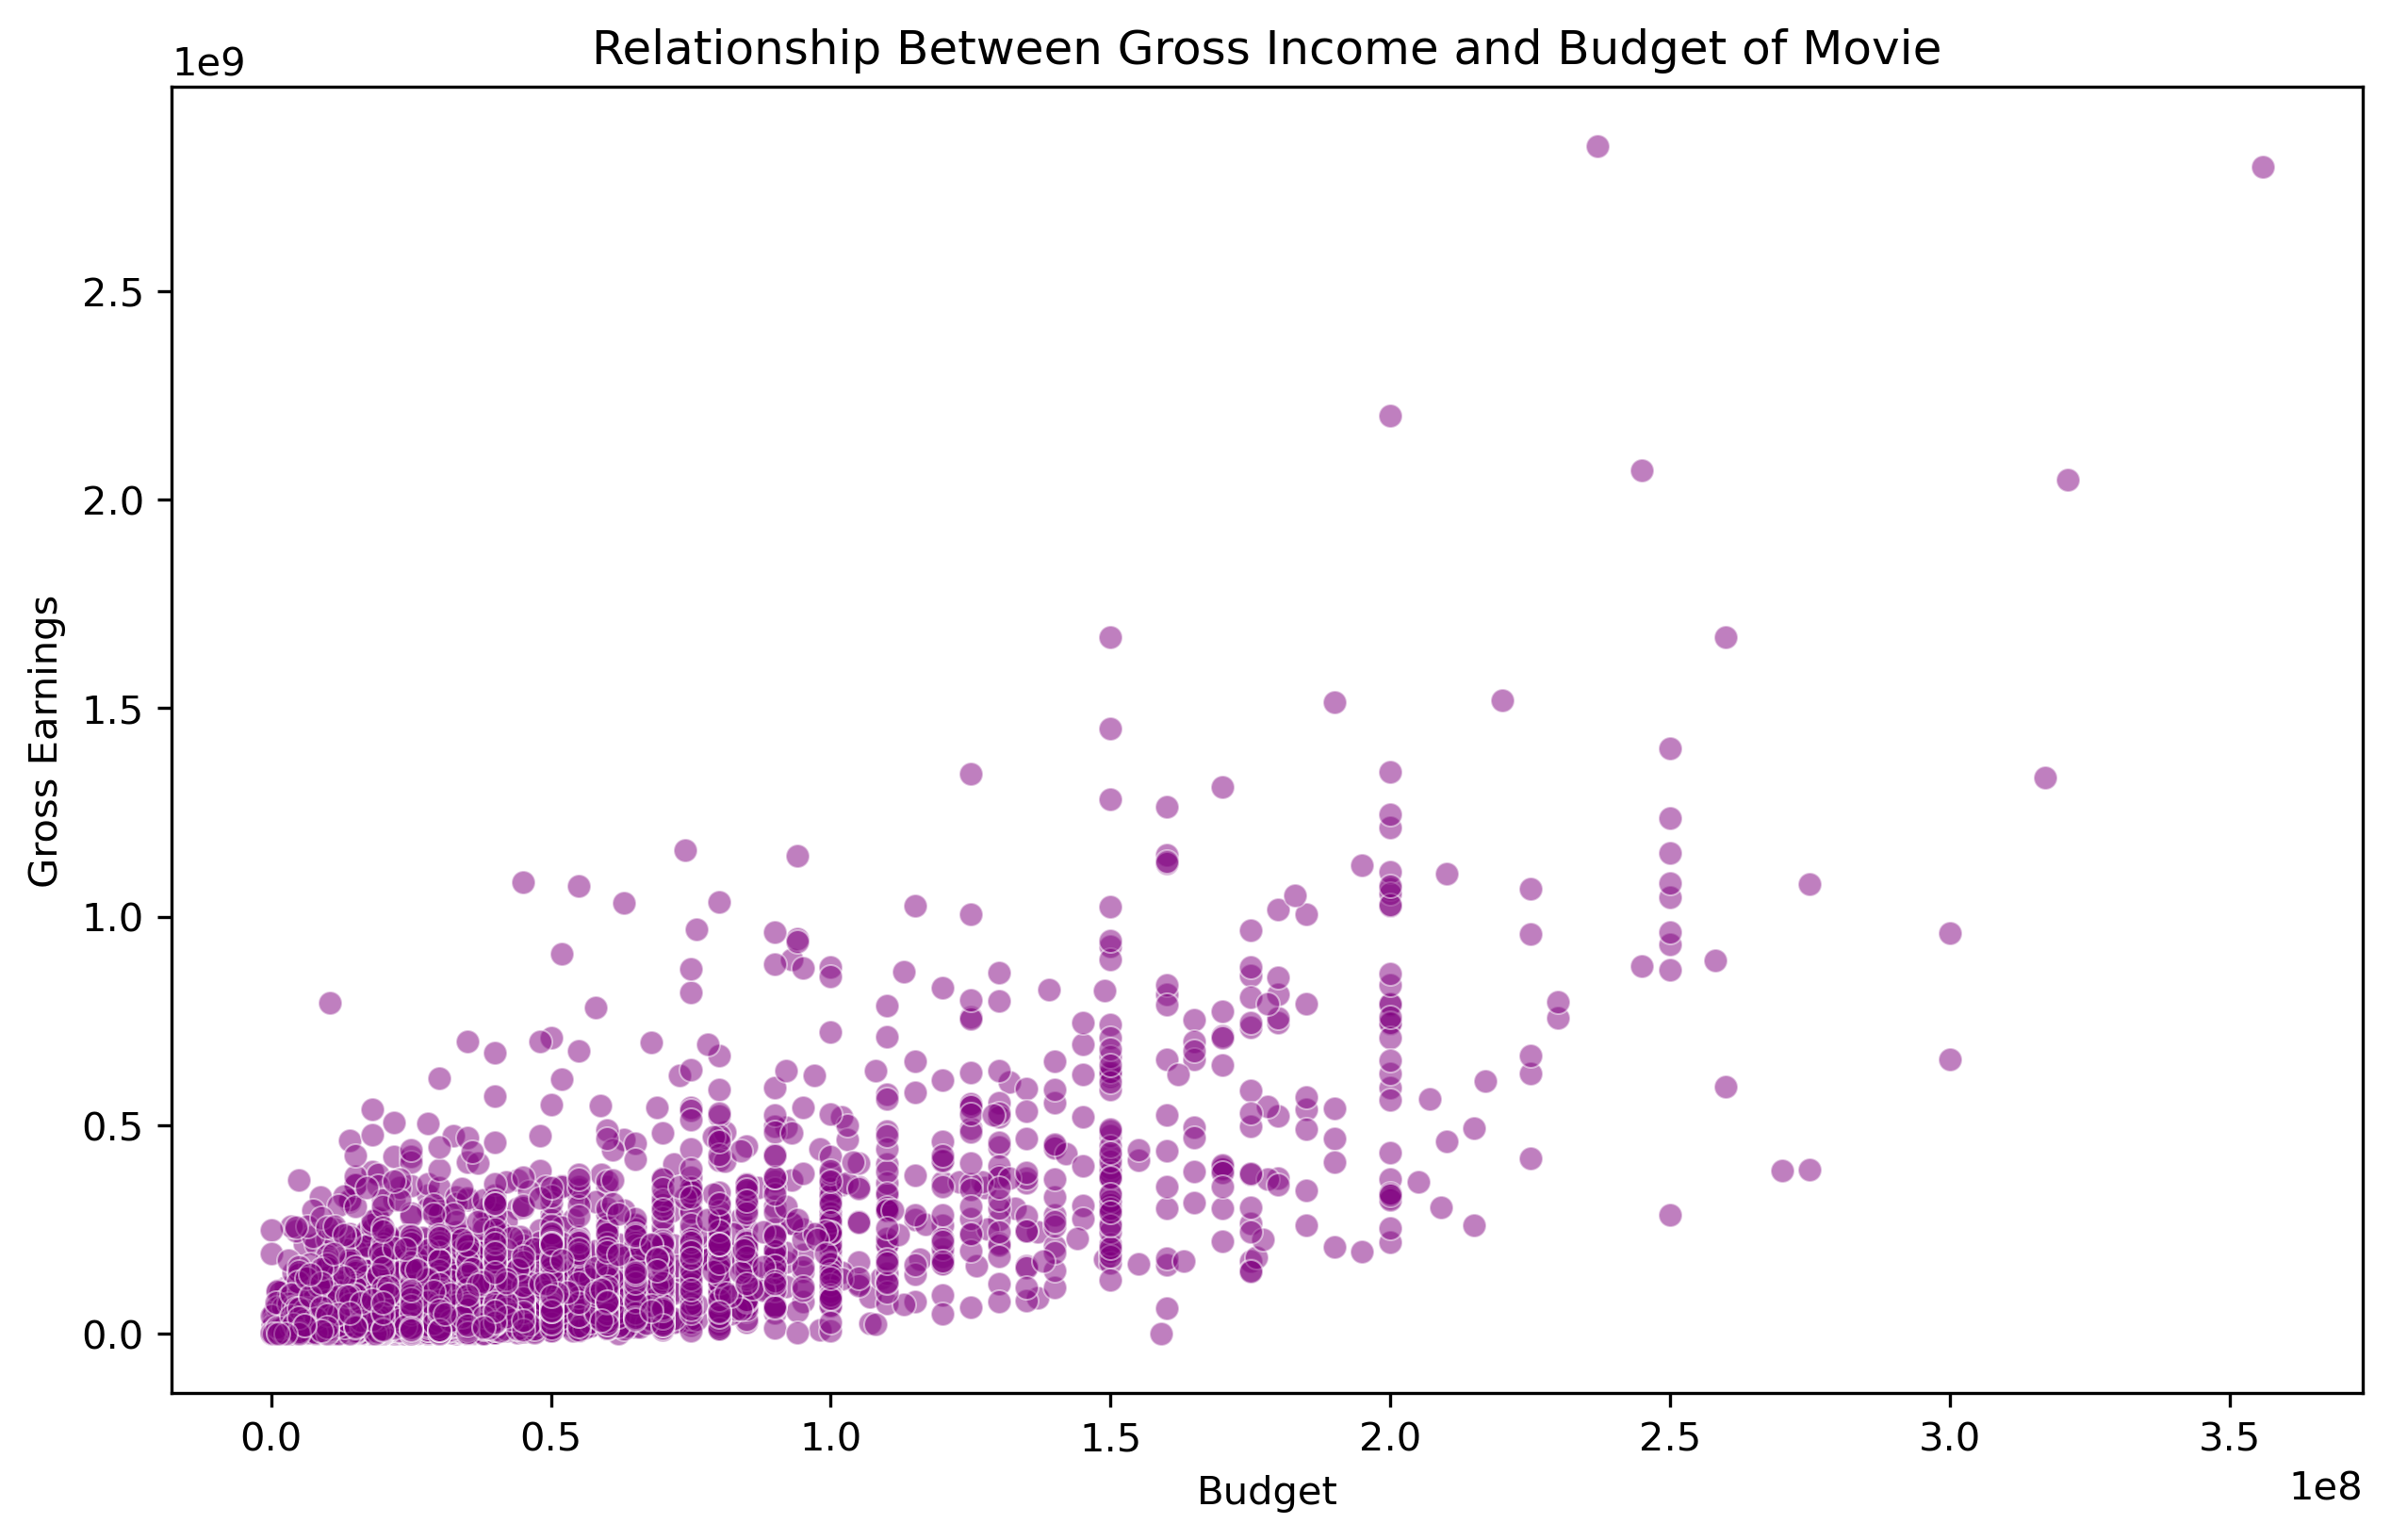

In [49]:
plt.figure(figsize = (10,6),dpi = 300)

sns.scatterplot(data = df, x = 'budget',y = 'gross',color = 'purple', alpha = 0.5)

plt.ylabel('Gross Earnings')
plt.xlabel('Budget')
plt.title('Relationship Between Gross Income and Budget of Movie')
plt.show()

The scatterplot doesn't seem to provide a lot of information on the correlation so we will add a linear line using the regplot to provide more detail.

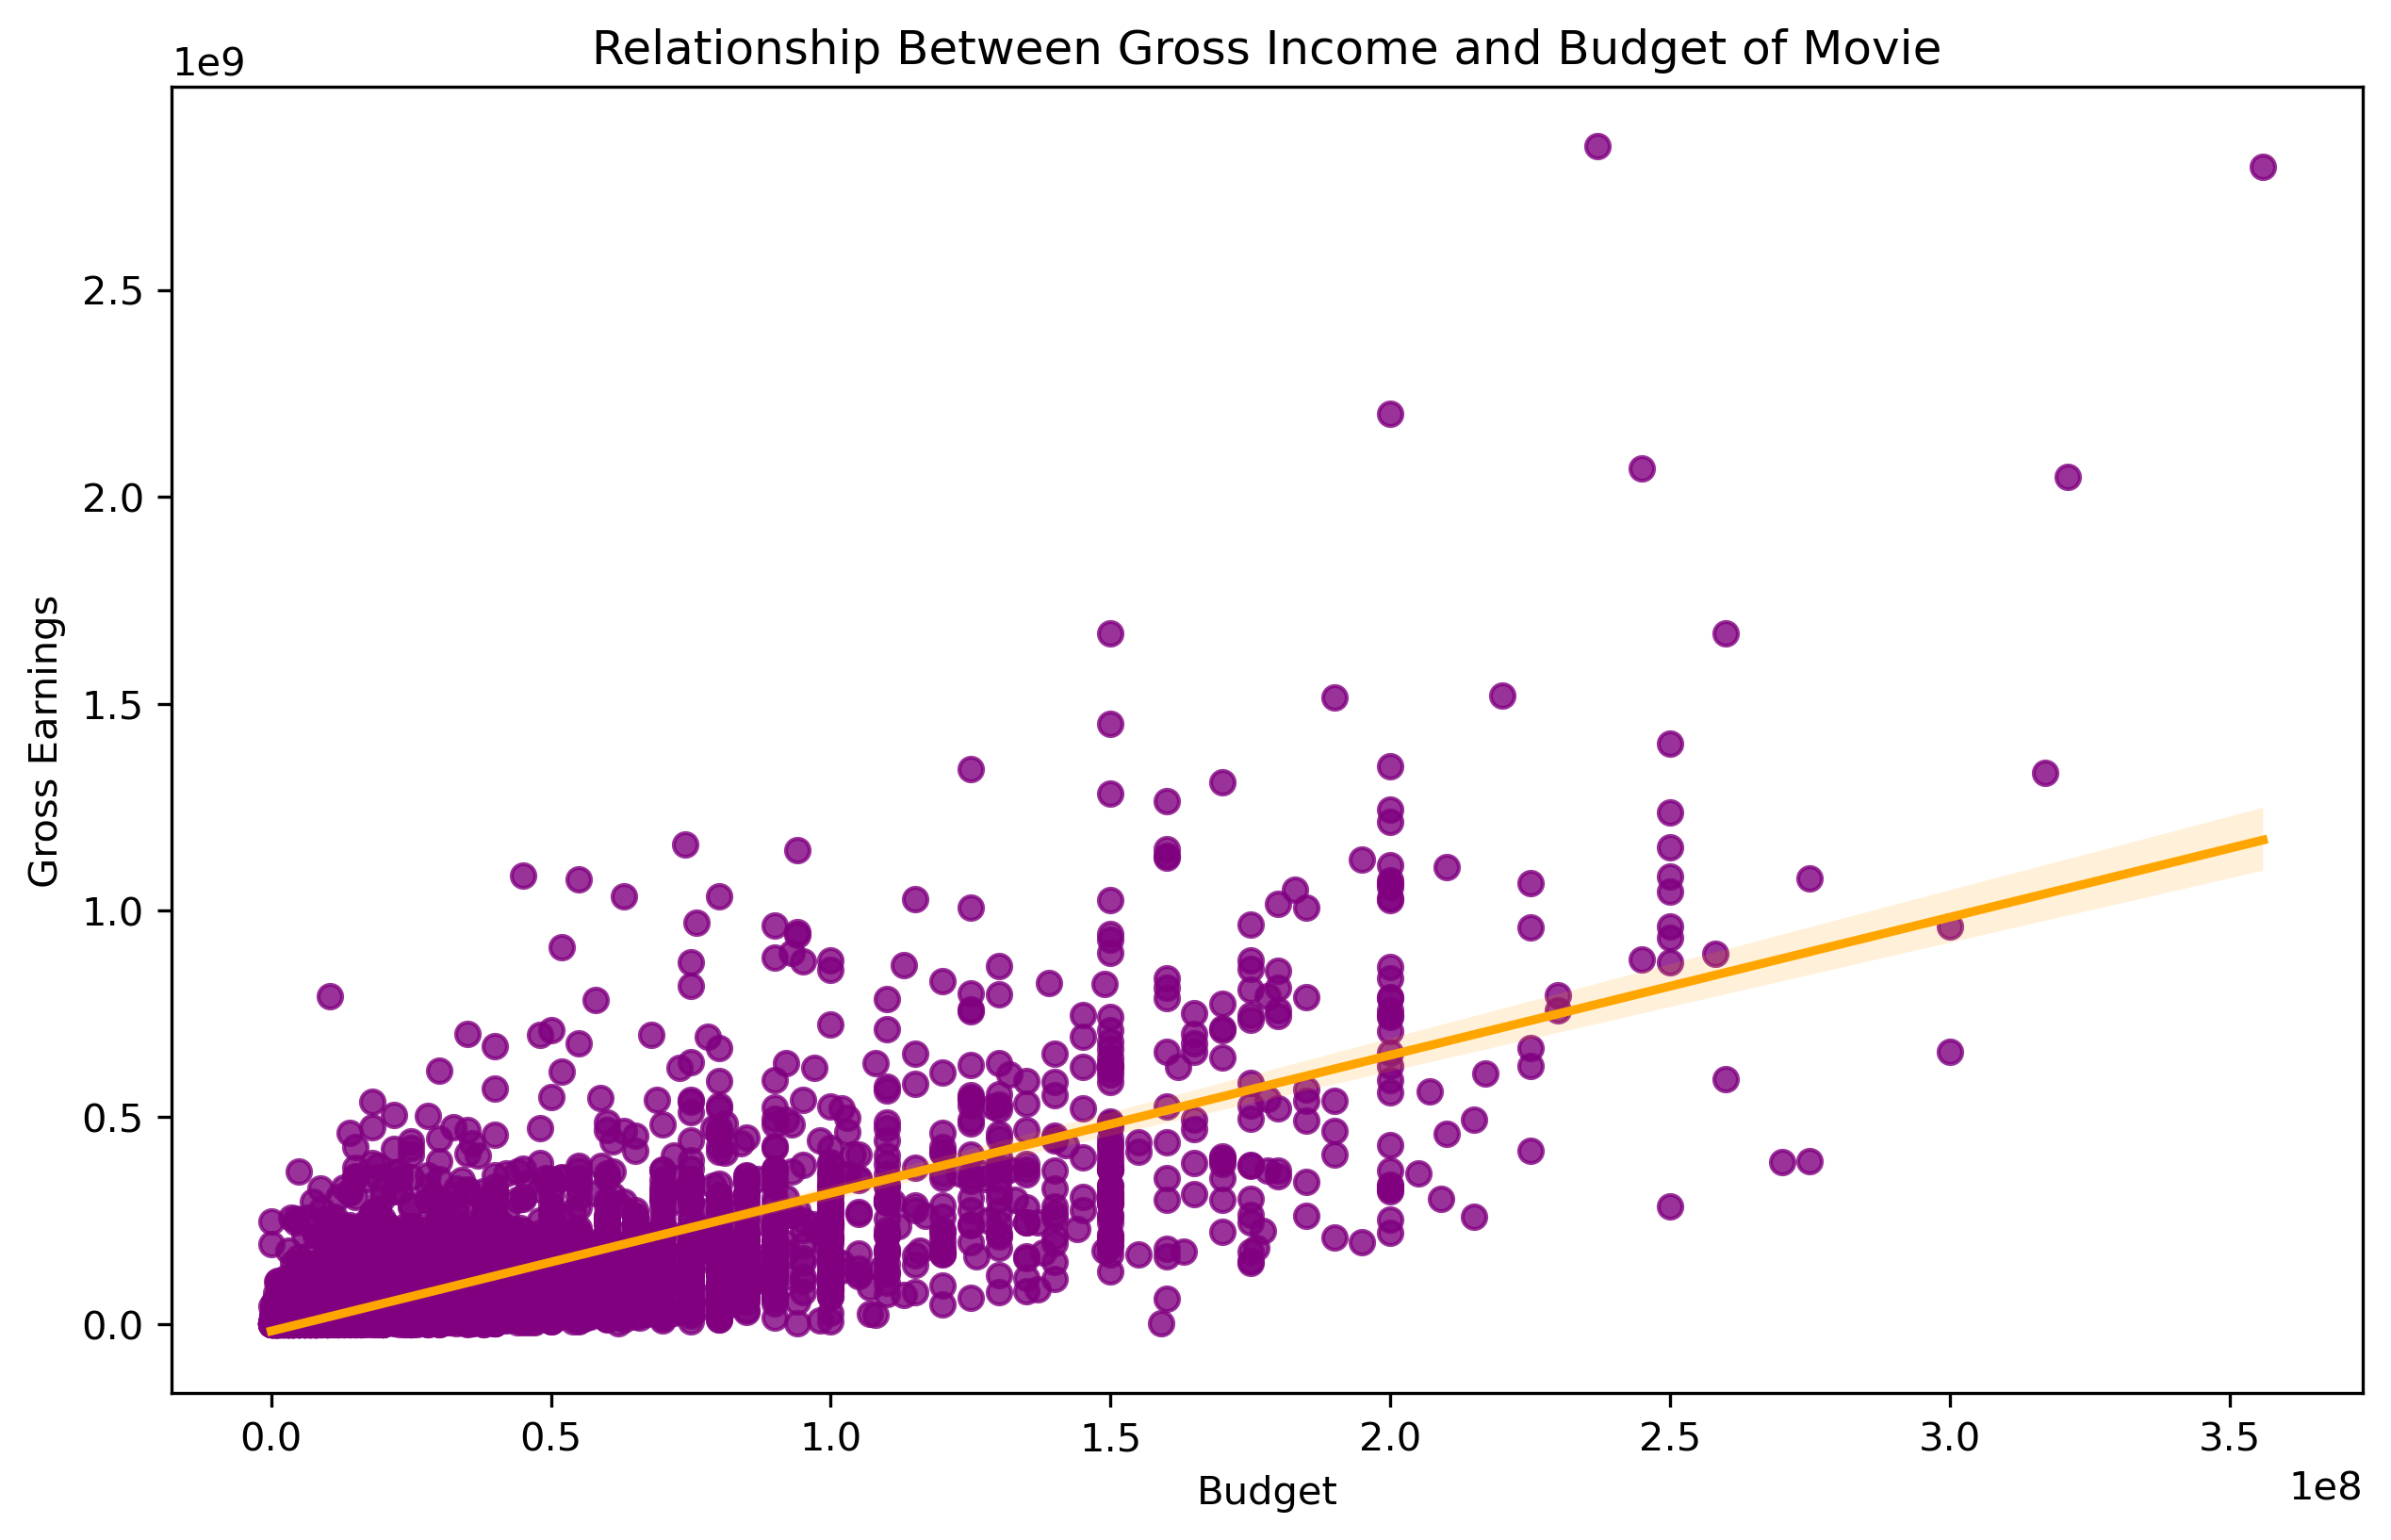

In [63]:
plt.figure(figsize = (10,6),dpi = 300)

sns.regplot(data = df, x = 'budget', y = 'gross', color = 'purple', line_kws = {'color':'orange'})

plt.ylabel('Gross Earnings')
plt.xlabel('Budget')
plt.title('Relationship Between Gross Income and Budget of Movie')
plt.show()

We can learn that there is a positive correlation but we still don't know the exact correlation value.

**Note** We are using the Pearson's correlation

We can go ahead and find the value

In [55]:
# We do not need to show correlation with the Year column so we remove it
correlation = df.drop('year',axis = 1).corr(numeric_only = True)
correlation

score     votes    budget     gross   runtime
score    1.000000  0.473738  0.071609  0.222034  0.414617
votes    0.473738  1.000000  0.439925  0.614858  0.352444
budget   0.071609  0.439925  1.000000  0.740364  0.318528
gross    0.222034  0.614858  0.740364  1.000000  0.275597
runtime  0.414617  0.352444  0.318528  0.275597  1.000000

<Axes: >

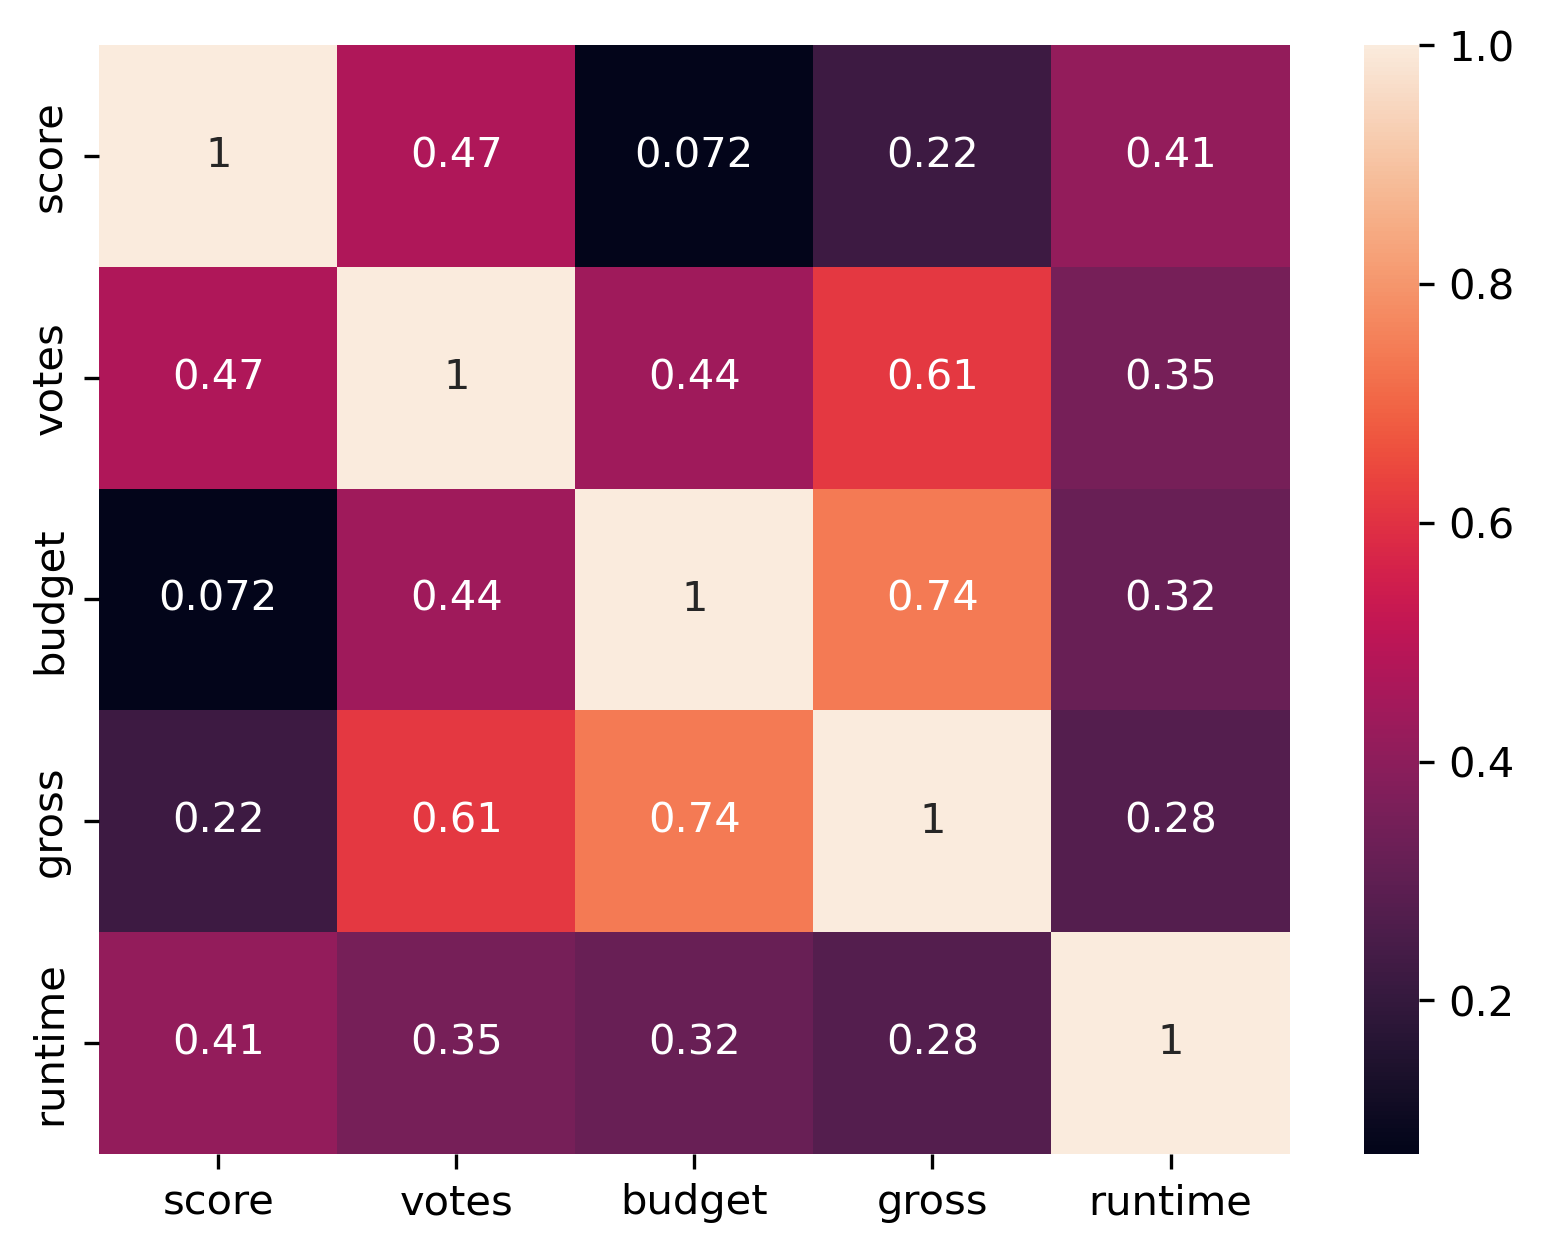

In [61]:
#We can visualize this using a heatmap too
plt.figure(dpi = 300)

sns.heatmap(data = correlation,annot = True)

plt.title("Correlation Matrix for Numeric Movie Features")

plt.show()

We also would like to see correlation of movies gross earnings with its non numeric features such as company,country,star e.t.c

Let's now convert the non_numeric columns into numeric first

In [71]:
# To avoid altering our dataframe we will store it in another variable which we will now use for our next steps

df_2 = df

# we create a for loop to convert each  non-numeric column
# to have numeric values that are unique identifiers of each categorical value in the respective columns

for column in df_2.columns:
    if df_2[column].dtype == 'object':
        df_2[column] = df_2[column].astype('category')
        df_2[column] =  df_2[column].cat.codes
            
            
df_2.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4704       6      6  1980      1308    8.4   927000.0      1798    2840   
1  3941       6      1  1980      1131    5.8    65000.0      1580    1159   
2  3653       4      0  1980      1363    8.7  1200000.0       759    1821   
3   205       4      4  1980      1131    7.7   221000.0       891    1415   
4   734       6      4  1980      1174    7.3   108000.0       721     351   

   star  country      budget        gross  company  runtime  
0   700       46  19000000.0   46998772.0     1432    146.0  
1   215       47   4500000.0   58853106.0      454    104.0  
2  1161       47  18000000.0  538375067.0      949    124.0  
3  1478       47   3500000.0   83453539.0     1114     88.0  
4   272       47   6000000.0   39846344.0     1089     98.0

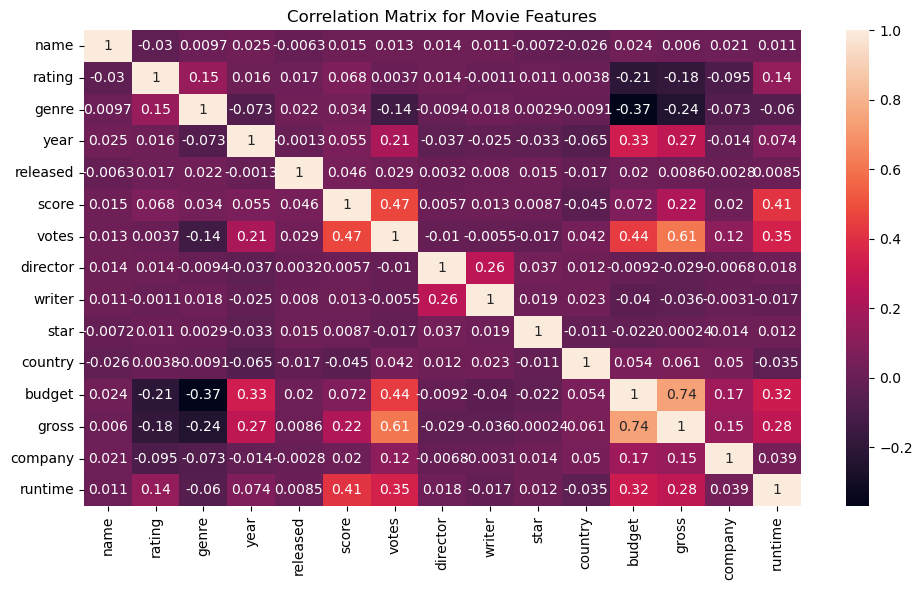

In [76]:
#We can visualize this using a heatmap
plt.figure(figsize = (10,6))

sns.heatmap(data = df_2.corr(),annot = True)

plt.title("Correlation Matrix for Movie Features")

plt.tight_layout()

plt.show()

In [87]:
df_2.corr()['gross'].abs().sort_values(ascending = False)

gross       1.000000
budget      0.740364
votes       0.614858
runtime     0.275597
year        0.274101
genre       0.244327
score       0.222034
rating      0.182698
company     0.149943
country     0.060635
writer      0.036122
director    0.029264
released    0.008650
name        0.005985
star        0.000236
Name: gross, dtype: float64

**budget** and **votes** are the features that are highly correlated with movies based on our Dataset